In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# constants
Z_SCORE_THRESHOLD = 2
WINDOWS = [30,60,90]
TICKER_SYMBOL = 'ESTC'
START_DATE = '2020-01-01'
ENDING_DATE = '2025-01-31'

def get_stock_data(stock_symbol, start_date, end_date):
    """Retrieves historical stock prices for the specified stock symbol and date range."""
    tickerDf = yf.Ticker(TICKER_SYMBOL)
    return tickerDf.history(period='1d', start=START_DATE, end=ENDING_DATE)

In [4]:
def compute_rolling_z_score(prices, WINDOWS):
    """Computes rolling Z-scores for multiple window lengths."""
    z_scores_map = {}
    for window in WINDOWS:
        rolling_avg = prices.rolling(window=window).mean()
        rolling_std = prices.rolling(window=window).std()
        z_scores_map[window] = (prices - rolling_avg) / rolling_std
    return z_scores_map 

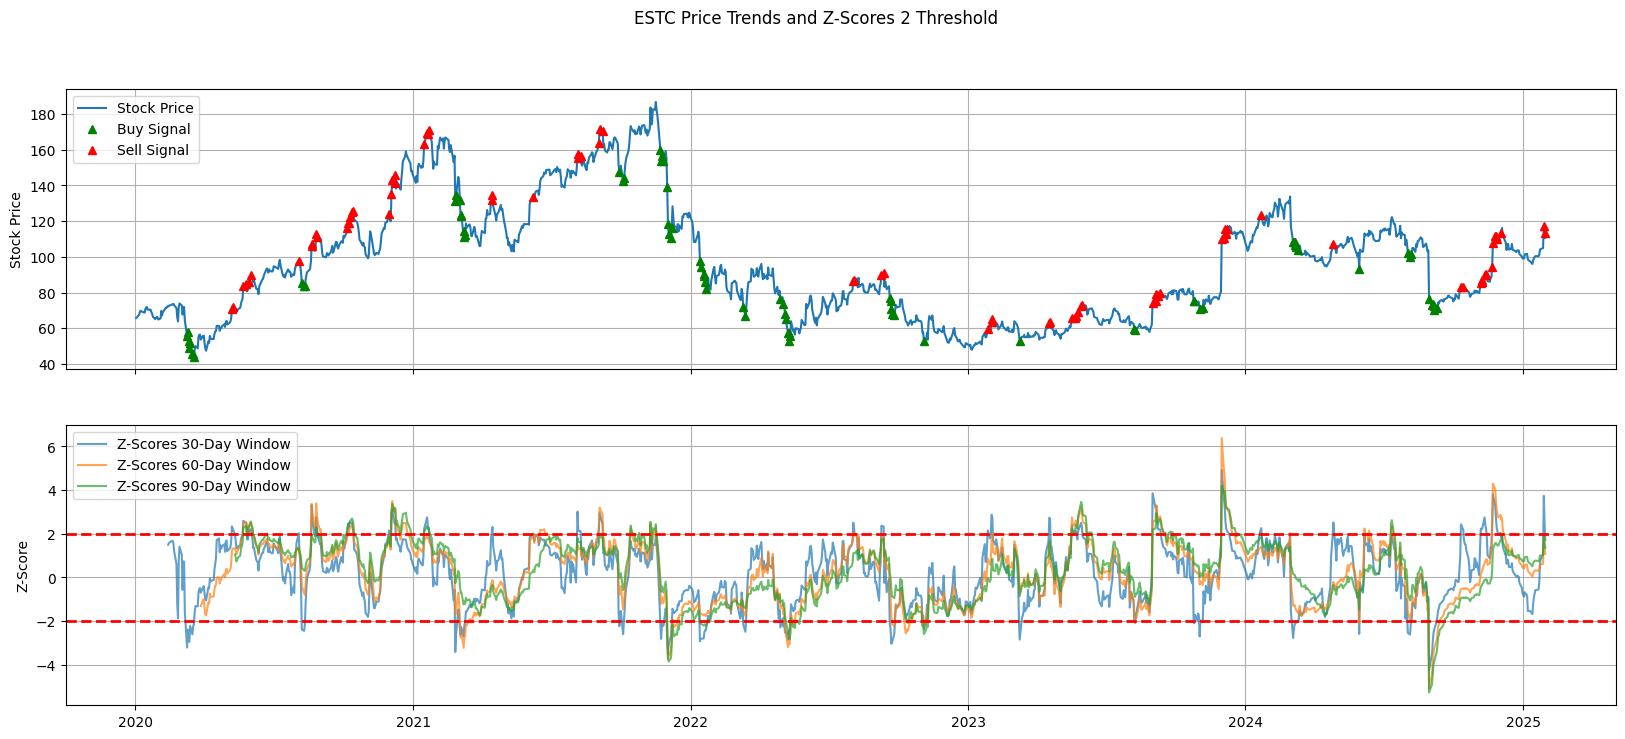

In [5]:
def visualize_stock_data(prices, z_scores_dict):
    """Visualizes stock data and Z-scores."""
    fig, (top_plot, bottom_plot) = plt.subplots(2, sharex=True, figsize=(20, 8))
    top_plot.plot(prices.index, prices, label='Stock Price')
    
    for window, z_scores in z_scores_dict.items():
        # Plot Z-scores for each window on the second subplot
        bottom_plot.plot(z_scores.index, z_scores, label=f'Z-Scores {window}-Day Window', alpha=0.7)
        
        # Add buy and sell markers on the price plot using the first window
        if window == WINDOWS[0]:
            buy_signals = z_scores < -Z_SCORE_THRESHOLD
            sell_signals = z_scores > Z_SCORE_THRESHOLD
            top_plot.plot(prices[buy_signals].index, prices[buy_signals], '^',   color='g', lw=0, label='Buy Signal')
            top_plot.plot(prices[sell_signals].index, prices[sell_signals], '^',   color='r', lw=0, label='Sell Signal')
    
    # Set labels and legend
    top_plot.set_ylabel('Stock Price')
    top_plot.legend(loc='upper left')
    top_plot.grid(True)

    # Draw threshold lines
    bottom_plot.axhline(-Z_SCORE_THRESHOLD, color='r', linestyle='--', lw=2)
    bottom_plot.axhline(Z_SCORE_THRESHOLD, color='r', linestyle='--', lw=2)
    bottom_plot.set_ylabel('Z-Score')
    bottom_plot.legend(loc='upper left')
    bottom_plot.grid(True)
   # plt.show()
    
    plt.suptitle(f'{TICKER_SYMBOL} Price Trends and Z-Scores {Z_SCORE_THRESHOLD} Threshold')
    plt.show()

# Get stock data
stock_data = get_stock_data(TICKER_SYMBOL, START_DATE, ENDING_DATE)

# Compute rolling Z-scores
rolling_z_score = compute_rolling_z_score(stock_data['Close'], WINDOWS)

# Visualize stock data and Z-scores
visualize_stock_data(stock_data['Close'], rolling_z_score)